In [1]:
import warnings
warnings.filterwarnings('ignore')

# Markdown
* a document formatting approach that makes writing documentation (or anything) pretty easy
* can do markdown outside of jupyter
    * filename `somefile.md`
* you can make code cells

```python
def example_function(x):
    return f'I am {x}'
```



# Machine Learning Issues

![xkcd_curve_fitting.png](images/xkcd_curve_fitting.png)

# Let's consider a scatterplot
* at differing levels of complexity
    * complexity can refer to number of features, width of a matrix, etc
    * complexity here just means order of a polynomial
    
$$
f(x) = ax^4 + bx^3 + cx^2 + dx + C
$$

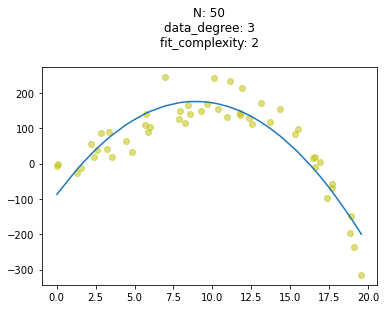

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def plot_scatter_fit(num_samps=50, fit_complexity=1, degree=1):
    N = num_samps
    
    np.random.seed(seed=23)
    
    # gen rand x vals
    x = np.random.rand(N)*20
    
    
    # define polynomial
    if degree == 1:
        y = 5*x + 3
    elif degree == 2:
        y = 3*x**2 + 5*x + 3
    elif degree == 3:
        y = -0.2*x**3 + 3*x**2 + 5*x + 3
    elif degree == 4:
        y = 0.006*x**4 + -0.2*x**3 + 3*x**2 + 5*x + 3


    # help us draw a fit line
    fit = np.polyfit(x, y, 1)
    fit_fn = np.poly1d(fit)
    
    
    # get scatter range
    y_val_range = np.ptp(y)
    
    
    # add guassian/normal noise
    y = [pt + np.random.normal(loc=0.0, scale=((1./10.)*y_val_range)) 
         for pt in y]

    # line that we draw
    fit_complexity_ = fit_complexity
    regr = np.poly1d(np.polyfit(x, y, fit_complexity_))(np.unique(x))

    
    # plot
    plt.title('N: {}\n'.format(N) + \
              'data_degree: {}\n'.format(degree) + \
              'fit_complexity: {}\n'.format(fit_complexity))
    
    plt.scatter(x, y, c='y', alpha=0.5)
    plt.plot(np.unique(x), regr)
    
    plt.show()
    
plot_scatter_fit(num_samps=50, fit_complexity=2, degree=3)

### Occam's Razor
* does a simpler model effectively explain the data/discover a signal in relation to a more complex model?
    * choose the simpler model that gets the job done effectively

<br><br>

# Apply CrossVal to a Classification Problem
* using the Iris Dataset
* Apply KNN, simple/naive algorithm


# KNN (K-Nearest Neighbors)
* KNN is supervised
    * X and y data
* KNN is non-parametric
    * potential to interpret a non-linear data signal
* KNN training data IS ESSENTIALLY the fit model
    * must store data/model in memory
    * prediction is computationally expensive
* KNN prediction is a majority vote betw the k most similar instances on a yet unseen data point

## Basic Algorithm for KNN
```
Given a structured data set:
    set value of k
    for each data point:
        find k most similar data points
        check class of each of k similar data points
        assume current data point is of the majority class checked
```

## Distance/Similarity metrics
* euclidean distance
* manhattan distance
* cosine similarity
* hamming distance/similarity

# General ML Workflow

## 1. Import/Clean/Reshape Data
* EDA (Exporatory Data Analysis)

In [26]:
# load libraries
import pandas as pd

# define colums
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# load training data
df = pd.read_csv('data/iris.data.txt', header=None, names=names)

columns = df.columns



df.head(10)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [27]:
# what are the class names?
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
len(df)

150

### Plot the data

In [30]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df[['class']]



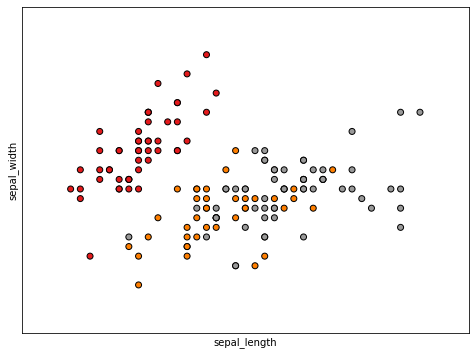

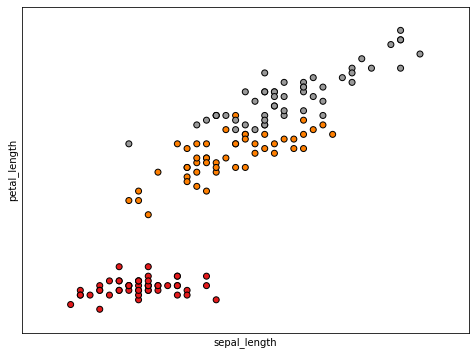

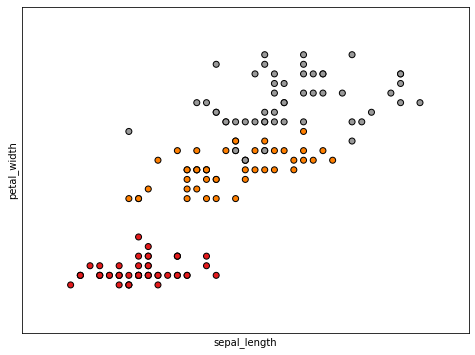

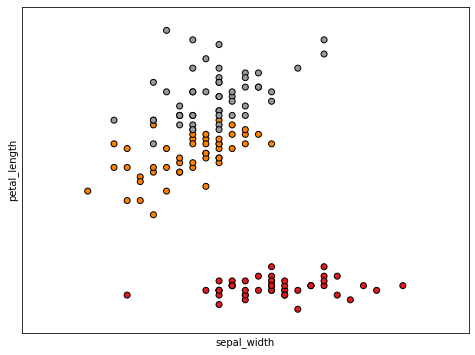

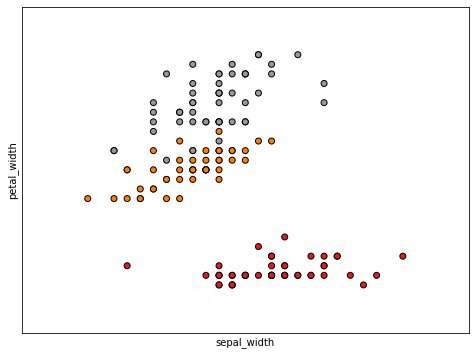

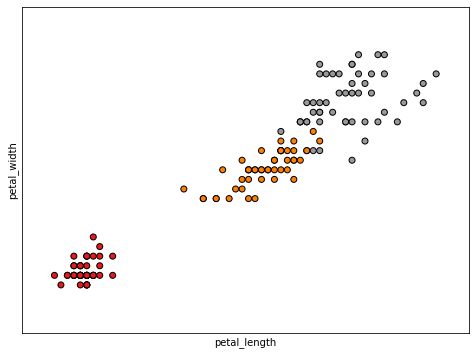

In [32]:
from sklearn.preprocessing import LabelEncoder

def plot_features(X_df, y_df, columns):
    le = LabelEncoder()
    y = le.fit_transform(y_df)
    
    # every pair of features
    built_pairs = []
    for col1 in columns[:-1]:
        for col2 in columns[:-1]:
            if col1 != col2 and (col1, col2) not in built_pairs and (col2, col1) not in built_pairs:
                tup = (col1, col2)
                built_pairs.append(tup)
                
    for pair in built_pairs:
        x_lab = pair[0]
        y_lab = pair[1]
        
        X = X_df[[x_lab, y_lab]].values
        
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

        plt.figure(2, figsize=(8,6))
        plt.clf()
        
        # plot the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
        plt.xlabel(x_lab)
        plt.ylabel(y_lab)
        
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        
        plt.xticks(())
        plt.yticks(())
        
        
        plt.show()
        
        
plot_features(X, y, columns)


* Note, we'll be using the least optimal features for this

## 2. Train/Test Split

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [36]:
# least separable features
X = np.array(df[['sepal_length', 'sepal_width']])
y = np.array(df[['class']])

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3 . Search for hyperparameters
* inputs to a model that we can tune to make the model work better on this data

In [45]:
# hold scores for vals of k neighbors
neighbors = list(range(1, 100))
cv_train_scores = []
cv_test_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, p=1)
    
    # fit the model
    knn.fit(X_train, y_train)
    
    # get preds on train
    y_train_pred = knn.predict(X_train)
    cv_train_scores.append(accuracy_score(y_train, y_train_pred))
    
    # get preds on test
    y_test_pred = knn.predict(X_test)
    cv_test_scores.append(accuracy_score(y_test, y_test_pred))

In [46]:
cv_train_scores;

In [48]:
cv_test_scores;

# Plot results

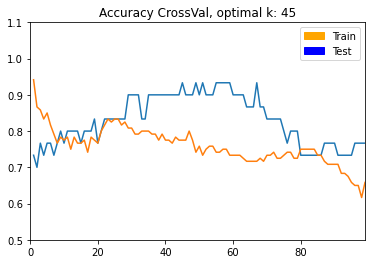

In [49]:
import matplotlib.patches as mpatches

test_max = cv_test_scores.index(max(cv_test_scores))
opt_k = neighbors[test_max]

axes = plt.gca()
axes.set_xlim([0, len(neighbors)])
axes.set_ylim([min(cv_test_scores) -0.2, 1.1])

orange_patch = mpatches.Patch(color='orange', label='Train')
blue_patch = mpatches.Patch(color='blue', label='Test')
plt.legend(handles=[orange_patch, blue_patch])

title = f'Accuracy CrossVal, optimal k: {opt_k}'

axes.plot(neighbors, cv_test_scores, label='test scores')
axes.plot(neighbors, cv_train_scores, label='train scores')

plt.title(title);